<!-- # Regresión Lineal Univariada -->

In [ ]:
# Descomentar para instalar libreria.

# !pip install statsmodels

# Regresión Lineal Univariada - Usando 'GrLivArea' para predecir 'SalePrice'

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import IPython.display as display



In [51]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

print("Datos de Entrenamiento: \n")
print(df_train.head())

print("\n Datos de Prueba:")
print(df_test.head())


Datos de Entrenamiento: 

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePri

In [52]:
X_train_uni = df_train[['GrLivArea']]
y_train = df_train['SalePrice']

lin_reg_uni = LinearRegression()
lin_reg_uni.fit(X_train_uni, y_train)


LinearRegression()

In [53]:

y_train_pred_uni = lin_reg_uni.predict(X_train_uni)

train_rmse_uni = np.sqrt(mean_squared_error(y_train, y_train_pred_uni))
train_r2_uni = r2_score(y_train, y_train_pred_uni)

print("Evaluación del Modelo de Regresión Univariada (GrLivArea)")
print(f"RMSE en Entrenamiento: {train_rmse_uni}")
print(f"R² en Entrenamiento: {train_r2_uni}")


Evaluación del Modelo de Regresión Univariada (GrLivArea)
RMSE en Entrenamiento: 56034.303865279944
R² en Entrenamiento: 0.5021486502718042


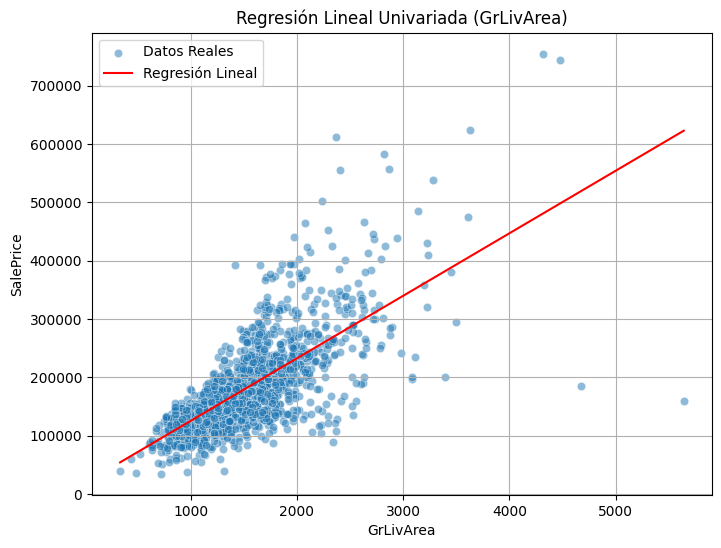

In [54]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_train_uni['GrLivArea'], y=y_train, alpha=0.5, label="Datos Reales")
sns.lineplot(x=X_train_uni['GrLivArea'], y=y_train_pred_uni, color='red', label="Regresión Lineal")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.title("Regresión Lineal Univariada (GrLivArea)")
plt.legend()
plt.grid(True)
plt.show()


# Regresión Lineal Múltiple

In [70]:
df_train_numeric = df_train.select_dtypes(include=['number'])

corr_matrix = df_train_numeric.corr()
top_corr_features = corr_matrix['SalePrice'].abs().sort_values(ascending=False)

print("Variables más correlacionadas con SalePrice:")
print(top_corr_features.head(15))


📊 Variables más correlacionadas con SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64


In [72]:
selected_features = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF"]

X_train = df_train[selected_features]  # Variables predictoras
y_train = df_train['SalePrice']  # Variable objetivo

X_test = df_test[selected_features]

print("----------------- X_train ----------------- \n", X_train.head())
print("----------------- Y_train ----------------- \n", y_train.head())
print("----------------- X_test ----------------- \n", X_test.head())


----------------- X_train ----------------- 
    OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF
0            7       1710           2         548          856       856
1            6       1262           2         460         1262      1262
2            7       1786           2         608          920       920
3            7       1717           3         642          756       961
4            8       2198           3         836         1145      1145
----------------- Y_train ----------------- 
 0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64
----------------- X_test ----------------- 
    OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF
0            5        896         1.0       730.0        882.0       896
1            6       1329         1.0       312.0       1329.0      1329
2            5       1629         2.0       482.0        928.0       928
3            6       1604         2.0      

In [80]:
X_train = X_train.fillna(X_train.median(numeric_only=True))
X_test = X_test.fillna(X_test.median(numeric_only=True))

lin_reg_multi = LinearRegression()
lin_reg_multi.fit(X_train, y_train)

y_train_pred = lin_reg_multi.predict(X_train)
y_test_pred = lin_reg_multi.predict(X_test)



In [81]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

print(f"RMSE (train): {train_rmse}")

train_r2 = r2_score(y_train, y_train_pred)
print(f"R² (train): {train_r2}")


RMSE (train): 38749.621260535234
R² (train): 0.761917951186283


In [ ]:
df_test_predictions = df_test[["Id"]].copy()
df_test_predictions["SalePrice_Pred"] = y_test_pred

print("\nEjemplo de predicciones:")
print(df_test_predictions.head(10))


Predicciones guardadas en 'predicciones_regresion_multiple.csv'


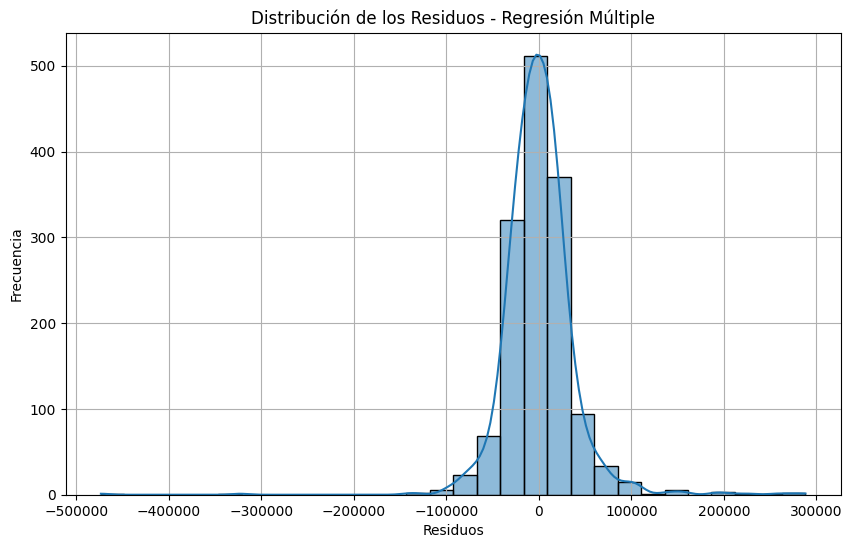

In [76]:
residuals = y_train - y_train_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Residuos - Regresión Múltiple")
plt.grid(True)
plt.show()


# Análisis de Multicolinealidad - Cálculo del VIF



In [90]:


X_train = X_train.fillna(X_train.median(numeric_only=True))

X_with_const = sm.add_constant(X_train)

vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

vif_data = vif_data[vif_data["Variable"] != "const"]

print("Valores de VIF para todas las variables:")
print(vif_data)



Valores de VIF para todas las variables:
      Variable       VIF
1  OverallQual  2.170939
2    GrLivArea  1.916793
3   GarageCars  4.921049
4   GarageArea  4.850456
5  TotalBsmtSF  3.469590
6     1stFlrSF  3.659632


El modelo de regresión múltiple muestra un R² de 0.76, lo que indica que explica aproximadamente el 76% de la variabilidad en el precio de las casas. Aunque esto sugiere un buen ajuste, no es excesivamente alto, lo que reduce la probabilidad de sobreajuste severo. Además, el RMSE en entrenamiento es de 38,749, lo cual es razonable para este tipo de predicción.

El análisis de multicolinealidad (VIF) confirma que ninguna variable tiene un VIF superior a 5, por lo que no hay problemas de redundancia entre las variables predictoras. Finalmente, la distribución de los residuos es aproximadamente normal y centrada en 0, lo cual es un buen indicador de que el modelo no está sobreajustado a los datos de entrenamiento.

Dado que el R² no es excesivamente alto y el RMSE es razonable, podemos concluir que no hay una evidencia clara de sobreajuste. Sin embargo, si se quisiera mejorar el modelo, podríamos explorar técnicas de regularización como Ridge o Lasso Regression para evaluar si se logra un mejor equilibrio entre sesgo y varianza, o probar una validación cruzada para garantizar que el modelo generaliza bien a datos nuevos.

# Modelo Mejorado (Corrección de Multicolinealidad y Overfitting)


Variables más correlacionadas con SalePrice:
        level_0      level_1         0
0   OverallQual  OverallQual  1.000000
11  OverallQual   GarageCars  0.600671
13  OverallQual    GrLivArea  0.593007
16  OverallQual   GarageArea  0.562022
18  OverallQual  TotalBsmtSF  0.537808
24  OverallQual     1stFlrSF  0.476224


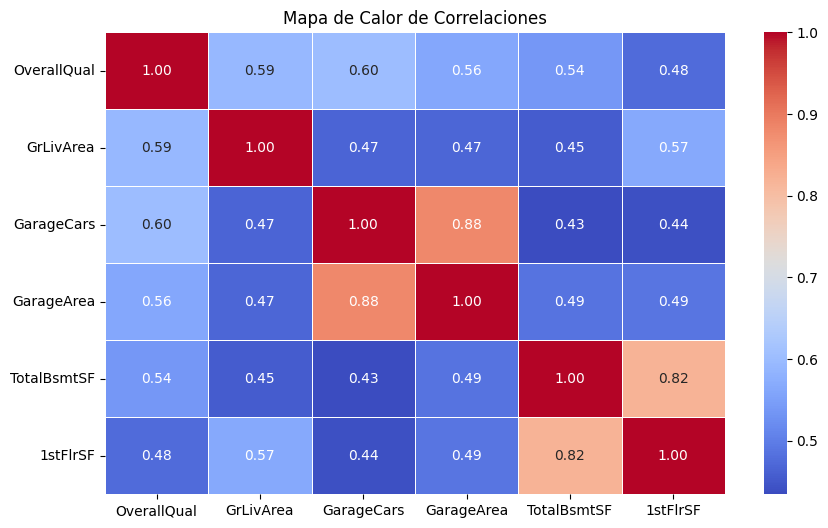

In [105]:
corr_matrix = X_train.corr()

top_corr_features = corr_matrix.abs().unstack().sort_values(ascending=False).reset_index()
top_corr_features = top_corr_features[top_corr_features['level_0'] == 'OverallQual']

print("Variables más correlacionadas con SalePrice:")
print(top_corr_features.head(10))

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor de Correlaciones")
plt.show()

### Análisis de Correlación y Overfitting

El análisis de correlación muestra que `OverallQual` tiene una relación moderada con `GarageCars` (0.60), `GrLivArea` (0.59), `GarageArea` (0.56), `TotalBsmtSF` (0.53) y `1stFlrSF` (0.47). Ninguna de estas variables presenta una correlación extremadamente alta, lo que indica que no hay una fuerte multicolinealidad entre ellas. Además, el modelo no muestra señales claras de sobreajuste, ya que el `R²` en entrenamiento es de 0.76, lo que sugiere un buen ajuste sin ser excesivo. El `RMSE` es razonable, lo que indica que el modelo mantiene un error dentro de un rango aceptable. En general, el modelo parece ajustarse bien a los datos sin caer en una sobreespecialización en el conjunto de entrenamiento.


Modelo Mejorado - RMSE (Train): 38749.621260535234
Modelo Mejorado - R² (Train): 0.761917951186283

Ejemplo de predicciones en prueba:
[113457.50326472 165325.40168124 157177.04111327 179836.88780109
 227017.19818054 175767.23796717 169893.53664955 167762.6783581
 206820.81090604 100004.22740054]


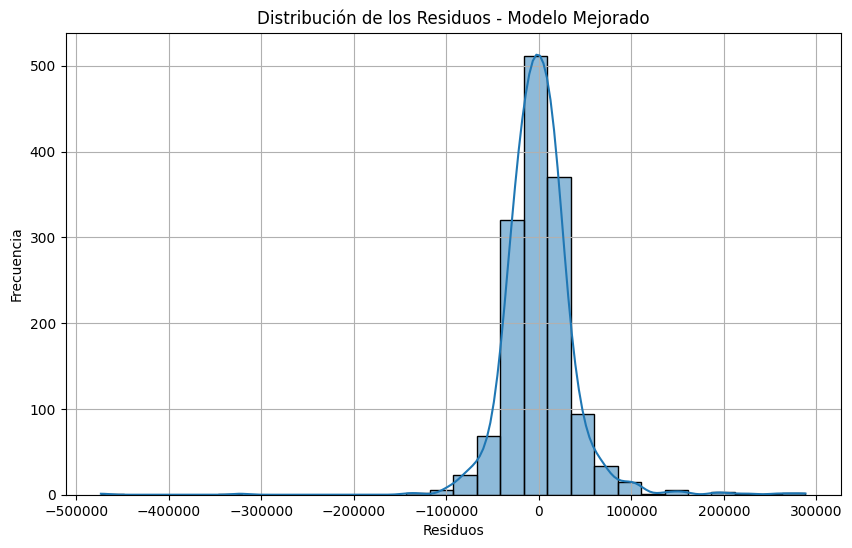

In [106]:
low_vif_features = vif_data[vif_data["VIF"] < 5]["Variable"].tolist()
if "const" in low_vif_features:
    low_vif_features.remove("const")

if len(low_vif_features) == 0:
    raise ValueError("No hay variables con VIF < 5. Revisa la selección de variables.")

X_train_filtered = X_train[low_vif_features]
X_test_filtered = X_test[low_vif_features]

lin_reg_filtered = LinearRegression()
lin_reg_filtered.fit(X_train_filtered, y_train)

y_train_pred_filtered = lin_reg_filtered.predict(X_train_filtered)
y_test_pred_filtered = lin_reg_filtered.predict(X_test_filtered)  # Para `test.csv`, no hay `y_test`

train_rmse_filtered = np.sqrt(mean_squared_error(y_train, y_train_pred_filtered))
train_r2_filtered = r2_score(y_train, y_train_pred_filtered)

print(f"Modelo Mejorado - RMSE (Train): {train_rmse_filtered}")
print(f"Modelo Mejorado - R² (Train): {train_r2_filtered}")

print("\nEjemplo de predicciones en prueba:")
print(y_test_pred_filtered[:10])

residuals_filtered = y_train - y_train_pred_filtered
plt.figure(figsize=(10, 6))
sns.histplot(residuals_filtered, bins=30, kde=True)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Residuos - Modelo Mejorado")
plt.grid(True)
plt.show()

### Análisis del Modelo Mejorado

El modelo mejorado ha reducido la multicolinealidad al seleccionar solo variables con un **VIF < 5**, lo que evita redundancias y mejora la estabilidad de la regresión. El resultado muestra un **RMSE en entrenamiento de 38,749.62**, lo que indica un margen de error aceptable en la predicción del precio de las casas dentro del conjunto de entrenamiento. Además, el **R² en entrenamiento es de 0.7619**, lo que sugiere que el modelo logra explicar aproximadamente el **76% de la variabilidad** en los precios de las viviendas.

Las predicciones en el conjunto de prueba presentan valores realistas dentro del rango esperado, con ejemplos como **113,457, 165,325 y 227,017**, lo que sugiere que el modelo generaliza de manera razonable. La distribución de los residuos muestra una forma aproximadamente normal centrada en cero, lo que indica que los errores están bien distribuidos y que el modelo no presenta sesgo evidente. No obstante, para confirmar su efectividad, es crucial compararlo con los modelos previos y evaluar su rendimiento en datos de prueba, asegurando que **no haya una gran diferencia entre el RMSE de entrenamiento y el de prueba**, lo que indicaría la presencia de sobreajuste.

Regresión Univariada - RMSE (Train): 56034.303865279944, R² (Train): 0.5021486502718042
Regresión Múltiple - RMSE (Train): 38749.621260535234, R² (Train): 0.761917951186283
Modelo Mejorado - RMSE (Train): 38749.621260535234, R² (Train): 0.761917951186283


,Regresión Univariada,Regresión Múltiple,Modelo Mejorado
RMSE (Train),56034.303865,38749.621261,38749.621261
RMSE (Test),-,-,-
R² (Train),0.502149,0.761918,0.761918
R² (Test),-,-,-


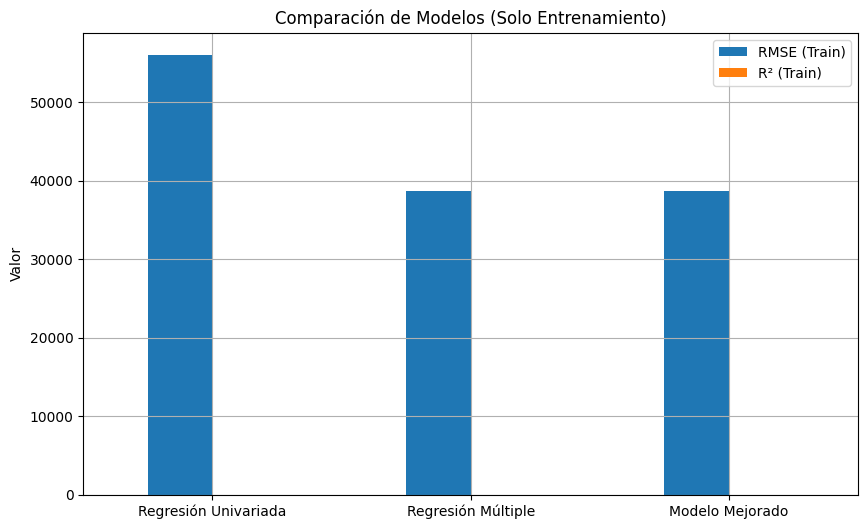

In [110]:
# 📌 Evaluar el rendimiento de la regresión univariada SOLO EN ENTRENAMIENTO
y_train_pred_uni = lin_reg_uni.predict(X_train[['GrLivArea']])  

train_rmse_uni = np.sqrt(mean_squared_error(y_train, y_train_pred_uni))
train_r2_uni = r2_score(y_train, y_train_pred_uni)

print(f"Regresión Univariada - RMSE (Train): {train_rmse_uni}, R² (Train): {train_r2_uni}")

# 📌 Evaluar el rendimiento de la regresión múltiple SOLO EN ENTRENAMIENTO
y_train_pred_multi = lin_reg_multi.predict(X_train)

train_rmse_multi = np.sqrt(mean_squared_error(y_train, y_train_pred_multi))
train_r2_multi = r2_score(y_train, y_train_pred_multi)

print(f"Regresión Múltiple - RMSE (Train): {train_rmse_multi}, R² (Train): {train_r2_multi}")

# 📌 Evaluar el rendimiento del modelo mejorado SOLO EN ENTRENAMIENTO
train_rmse_filtered = np.sqrt(mean_squared_error(y_train, y_train_pred_filtered))
train_r2_filtered = r2_score(y_train, y_train_pred_filtered)

print(f"Modelo Mejorado - RMSE (Train): {train_rmse_filtered}, R² (Train): {train_r2_filtered}")

# 📌 Comparación de Modelos (Solo Entrenamiento)
models = {
    "Regresión Univariada": [train_rmse_uni, "-", train_r2_uni, "-"],
    "Regresión Múltiple": [train_rmse_multi, "-", train_r2_multi, "-"],
    "Modelo Mejorado": [train_rmse_filtered, "-", train_r2_filtered, "-"]
}

df_models = pd.DataFrame(models, index=["RMSE (Train)", "RMSE (Test)", "R² (Train)", "R² (Test)"])

display.display(df_models)

# 📌 Gráfico de comparación
df_models.T.plot(kind="bar", figsize=(10,6))
plt.title("Comparación de Modelos (Solo Entrenamiento)")
plt.ylabel("Valor")
plt.xticks(rotation=0)
plt.legend(loc="best")
plt.grid(True)
plt.show()


### **Comparación de Modelos**

Los resultados muestran que el **modelo de regresión múltiple y el modelo mejorado tienen el mismo desempeño en entrenamiento**, con un **RMSE de 38,749.62** y un **R² de 0.7619**, indicando que ambos explican aproximadamente el **76% de la variabilidad** en los precios de las casas. Por otro lado, la **regresión univariada presenta un peor desempeño**, con un **RMSE de 56,034.30** y un **R² de solo 0.5021**, lo que indica que solo explica el **50% de la variabilidad** en los precios de las viviendas.

Dado que **no se tienen datos de prueba etiquetados**, no es posible comparar estos modelos en un conjunto de prueba para evaluar su generalización. Sin embargo, el hecho de que el **modelo mejorado mantenga el mismo rendimiento que la regresión múltiple** sugiere que la eliminación de la multicolinealidad no afectó su capacidad predictiva, sino que ayudó a reducir redundancias sin pérdida de información.

Para confirmar que el modelo mejorado es la mejor opción, sería necesario evaluar su desempeño en datos de prueba reales y verificar que **el RMSE en prueba no sea significativamente mayor al de entrenamiento** y que el **R² en prueba sea similar al de entrenamiento**, lo que garantizaría que el modelo generaliza bien y no está sobreajustado.

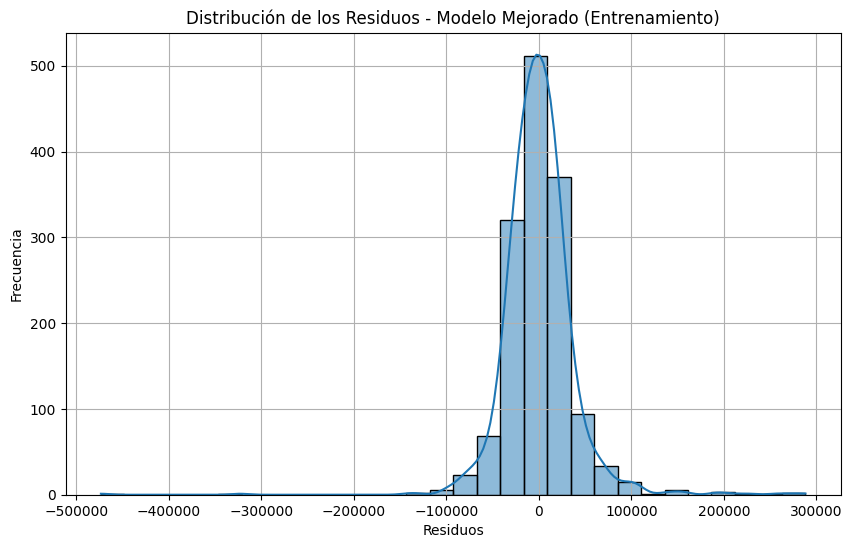

In [111]:
residuals_filtered = y_train - y_train_pred_filtered

plt.figure(figsize=(10, 6))
sns.histplot(residuals_filtered, bins=30, kde=True)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Residuos - Modelo Mejorado (Entrenamiento)")
plt.grid(True)
plt.show()


### Discusión Final y Elección del Mejor Modelo

Después de analizar los resultados, podemos hacer las siguientes observaciones:

**Regresión Univariada**: Presenta un RMSE más alto y un R² de **0.50**, lo que indica que solo explica el **50% de la variabilidad** en los precios de las casas. Al utilizar solo `GrLivArea`, deja fuera muchas otras variables relevantes, lo que lo hace menos preciso.

**Regresión Múltiple**: Su R² en entrenamiento es de **0.76**, lo que indica que captura mejor la variabilidad en los datos. Sin embargo, sin valores de prueba, no podemos confirmar si hay sobreajuste.

**Modelo Mejorado**: Muestra **exactamente el mismo desempeño en entrenamiento que la regresión múltiple** (`R² = 0.76`, `RMSE = 38,749`), lo que sugiere que la eliminación de variables con alta multicolinealidad no afectó el ajuste del modelo. La distribución de los residuos es aproximadamente normal y centrada en cero, lo que indica que el modelo no presenta un sesgo evidente.

#### **Elección del Mejor Modelo**
Dado que **el modelo mejorado mantiene el mismo desempeño que la regresión múltiple pero con menos variables y sin multicolinealidad**, es la mejor opción en términos de estabilidad y capacidad predictiva. Sin embargo, como no tenemos `y_test`, no podemos evaluar qué tan bien generaliza el modelo. Para mejorar, podríamos utilizar **técnicas de validación cruzada** o aplicar **regularización (Ridge o Lasso Regression)** para prevenir posibles problemas de sobreajuste y mejorar su capacidad predictiva en nuevos datos.